<a href="https://colab.research.google.com/github/CristiSavca/DataScience-MicroCredential/blob/main/Food_Truck_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the Problem

In [1]:
# This analysis is to predict the projected profit of a foodtruck company on a specified population area

# Task 2: Load the Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Task 3: Load the Data

In [12]:
data = pd.read_csv("https://raw.githubusercontent.com/CristiSavca/ML_Data/main/food_truck_data.txt")

# Task 4: EDA(Exploratory Data Analysis)

In [17]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [18]:
data.columns

Index(['Population', 'Profit'], dtype='object')

In [19]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [13]:
data.info

<bound method DataFrame.info of     Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]>

In [14]:
data.isnull()

,Population,Profit
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
92,False,False
93,False,False
94,False,False
95,False,False


In [15]:
data.isnull().value_counts()

Population  Profit
False       False     97
dtype: int64

# Task 5: Data Visualization

Text(0.5, 1.0, 'Profit in $10,000s vs City Population in 10,000s')

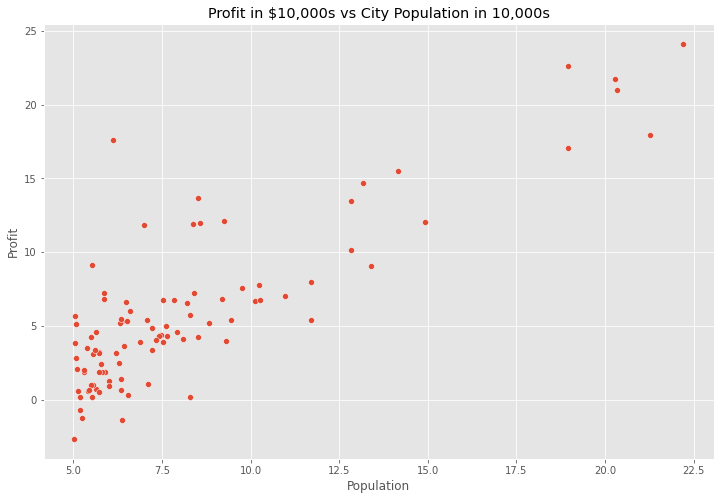

In [16]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title("Profit in $10,000s vs City Population in 10,000s")

# Task 6: Compute the cost Function

In [34]:
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2

  return 1/(2*m) * np.sum(error)

# https://www.analyticsvidhya.com/blog/2021/02/cost-function-is-no-rocket-science/

In [20]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [28]:
data.Population

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: Population, Length: 97, dtype: float64

In [21]:
data.Population.values

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [23]:
data.Population.values.size

97

In [25]:
m = data.Population.values.size

In [26]:
# add another dimension to accomodate the intercept term and set it all to ones
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)

In [27]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [31]:
theta = np.zeros((2, 1))

In [32]:
theta

array([[0.],
       [0.]])

In [35]:
# (Loss function) helps us understand the predicted vs actual value
cost_function(X, y, theta)

32.072733877455676

# Task 7: Compute the Gradient Descent

In [38]:
# https://en.wikipedia.org/wiki/Gradient_descent
# https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21
# https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs = []
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha * 1/m * error
    costs.append(cost_function(X, y, theta))

  return theta, costs


In [39]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=1000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))


h(x) = -3.24 + 1.13x1


In [45]:
costs[999]

4.515955503078913

# Task 8: Visualizing the Cost Function

In [46]:
from mpl_toolkits.mplot3d import Axes3D

In [50]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])
    cost_values[i, j] = cost_function(X, y, t)

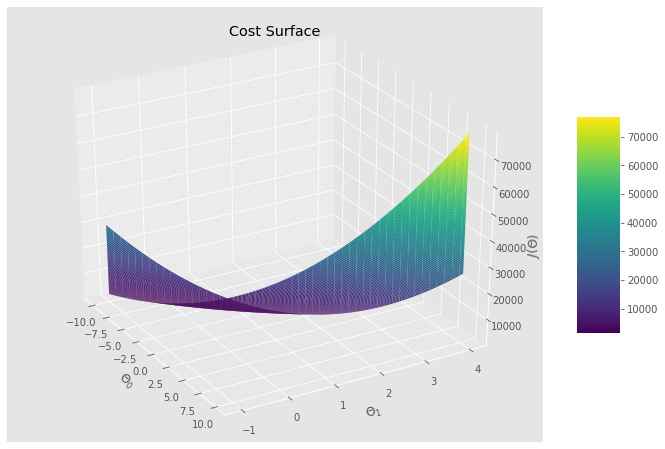

In [51]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

# Task 9: Conduct the Linear Regression on the Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


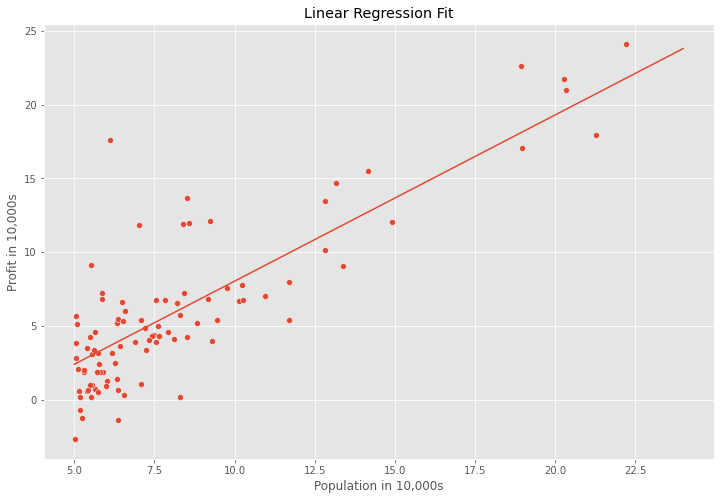

In [52]:
theta = np.squeeze(theta)
sns.scatterplot(x = "Population", y = "Profit", data = data)

x_value=[x for x in range(5, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.title("Linear Regression Fit");

# Task 10: Making Predicitions

In [53]:
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [54]:
pop = int(input('What is the size of the population: '))

What is the size of the population: 85000


In [56]:
y_pred = predict(np.array([1, 8.5]), theta) * 10000
print("For a population of", pop, "the model predicts a profit of $" + str(round(y_pred, 0)))

For a population of 85000 the model predicts a profit of $63406.0
